In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Muestra todas las filas
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_columns', None)  
df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")

#Juntamos el csv con "madrid 2019-04-08 to 2022-01-01.csv"
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df = pd.concat([df, df2], ignore_index=True)
#Ordenamos por fecha
df = df.sort_values(by='datetime', ascending=True) 
df.reset_index(drop=True, inplace=True)

df.drop("name", axis=1, inplace=True)


# Convertir la columna a tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

#Crear  columna años
df["year"]=df["datetime"].dt.year





#Correlaciones

correlaciones = df[["tempmax","tempmin","temp","feelslikemax","feelslikemin","feelslike","dew","humidity","precip","precipprob","precipcover","windgust","winddir","windspeed","sealevelpressure","cloudcover","visibility","solarradiation","solarenergy","uvindex"]].corr()


correlaciones


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,winddir,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
tempmax,1.000000,0.907260,0.980883,0.995636,0.914847,0.978793,0.504732,-0.806149,-0.159680,-0.370821,-0.373526,-0.122224,-0.019222,-0.032192,-0.201027,-0.520451,0.365642,0.785748,0.785803,0.640729
tempmin,0.907260,1.000000,0.966384,0.904047,0.991827,0.962307,0.705375,-0.618482,-0.029008,-0.140280,-0.148799,0.033600,0.001748,0.115371,-0.355102,-0.239816,0.231770,0.592668,0.592472,0.458160
temp,0.980883,0.966384,1.000000,0.975785,0.966651,0.995987,0.593461,-0.753342,-0.108506,-0.279027,-0.283998,-0.047020,-0.000580,0.047985,-0.289302,-0.409466,0.319134,0.731010,0.730910,0.581874
feelslikemax,0.995636,0.904047,0.975785,1.000000,0.915550,0.979790,0.528506,-0.788122,-0.155209,-0.365772,-0.372592,-0.130417,-0.026182,-0.044574,-0.189453,-0.506325,0.364183,0.783951,0.783984,0.648428
feelslikemin,0.914847,0.991827,0.966651,0.915550,1.000000,0.970996,0.714446,-0.613925,-0.040219,-0.171694,-0.183530,-0.015149,-0.002496,0.059139,-0.310821,-0.257505,0.220750,0.600240,0.600049,0.465713
feelslike,0.978793,0.962307,0.995987,0.979790,0.970996,1.000000,0.615792,-0.736193,-0.107918,-0.284367,-0.294988,-0.072108,-0.007531,0.016894,-0.265925,-0.401460,0.312292,0.729543,0.729428,0.585199
dew,0.504732,0.705375,0.593461,0.528506,0.714446,0.615792,1.000000,0.058207,0.189104,0.195972,0.190476,0.081786,0.019985,0.073986,-0.275546,0.176672,-0.100161,0.136487,0.136482,0.102454
humidity,-0.806149,-0.618482,-0.753342,-0.788122,-0.613925,-0.736193,0.058207,1.000000,0.314226,0.515238,0.546604,0.134134,0.029250,0.000122,0.134819,0.655411,-0.560476,-0.827182,-0.827083,-0.694696
precip,-0.159680,-0.029008,-0.108506,-0.155209,-0.040219,-0.107918,0.189104,0.314226,1.000000,0.352919,0.639001,0.267173,-0.044699,0.142624,-0.273060,0.334769,-0.225810,-0.274847,-0.275264,-0.256736
precipprob,-0.370821,-0.140280,-0.279027,-0.365772,-0.171694,-0.284367,0.195972,0.515238,0.352919,1.000000,0.682580,0.340061,0.026552,0.317743,-0.291095,0.583036,-0.255241,-0.434548,-0.434980,-0.345497


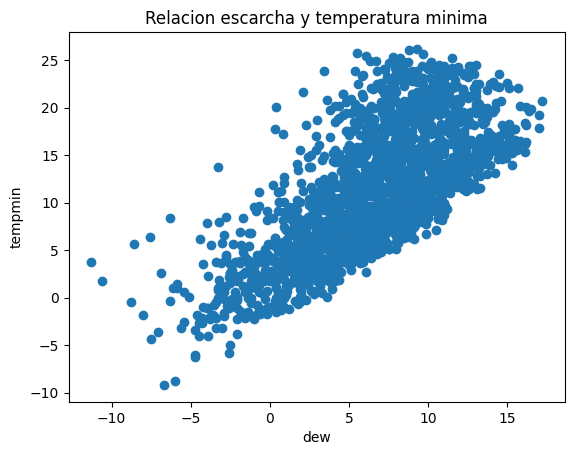

In [18]:
# Graficar  dew y temopmin



plt.scatter(df["dew"],df["tempmin"])
plt.xlabel("dew")
plt.ylabel("tempmin")
plt.title("Relacion escarcha y temperatura minima")
plt.show()



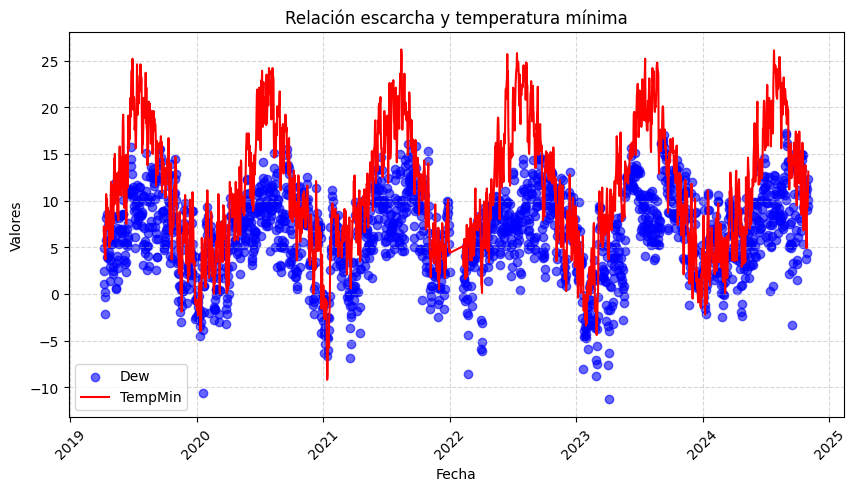

In [19]:
grouped= df.groupby("year")


import matplotlib.pyplot as plt

# Graficar dew como puntos y tempmin como línea
plt.figure(figsize=(10, 5))  # Ajustar tamaño de la gráfica
plt.scatter(df["datetime"], df["dew"], label="Dew", color="blue", alpha=0.6)
plt.plot(df["datetime"], df["tempmin"], label="TempMin", color="red")

# Mejoras en la visualización
plt.title("Relación escarcha y temperatura mínima")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)  # Agregar rejilla suave

# Mostrar gráfica
plt.show()

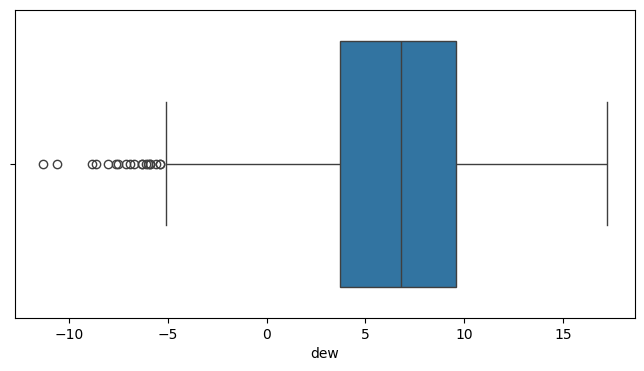

In [20]:
# Creamos el Boxplot dew

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['dew']) #df['valores'] es una columna de un DataFrame que contiene los datos que queremos analizar.

# Mostramos el gráfico
plt.show()


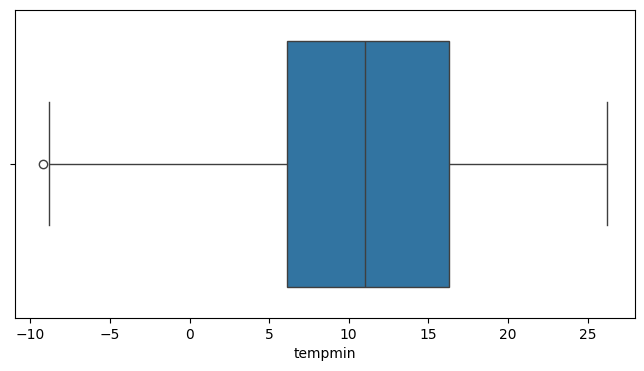

In [21]:
# Creamos el Boxplot tempmin

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['tempmin']) #df['valores'] es una columna de un DataFrame que contiene los datos que queremos analizar.

# Mostramos el gráfico
plt.show()


In [22]:
#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,year,icono numero
0,2019-04-08,16.7,7.2,10.7,16.7,6.2,10.5,4.9,71.7,2.043,100,62.50,rain,0.0,0.0,53.6,30.2,257.2,1011.8,76.4,12.7,165.1,14.2,8,NaN,2019-04-08T07:47:52,2019-04-08T20:46:12,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"08224099999,D8661,08219099999,08220099999,0821...",2019,3
1,2019-04-09,13.1,5.1,8.6,13.1,3.7,7.5,2.5,67.6,0.416,100,29.17,rain,0.0,0.0,52.9,22.8,267.3,1012.8,58.9,20.2,165.8,14.5,7,NaN,2019-04-09T07:46:18,2019-04-09T20:47:14,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"08224099999,D8661,08219099999,08220099999,0821...",2019,3
2,2019-04-10,14.7,6.2,9.9,14.7,3.9,8.9,1.1,56.0,0.685,100,20.83,rain,0.0,0.0,33.4,23.1,297.7,1013.4,58.8,20.9,233.3,20.2,8,NaN,2019-04-10T07:44:43,2019-04-10T20:48:16,0.18,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"08221099999,08224099999,LEMD,D8661,08226099999...",2019,3
3,2019-04-11,16.5,4.4,10.5,16.5,2.3,10.0,-0.3,49.1,0.000,0,0.00,NaN,0.0,0.0,29.2,12.4,28.9,1017.4,32.6,20.3,250.1,21.5,10,NaN,2019-04-11T07:43:09,2019-04-11T20:49:18,0.21,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08221099999,08224099999,LEMD,D8661,08226099999...",2019,2
4,2019-04-12,18.7,3.9,11.4,18.7,3.9,11.2,0.2,49.4,0.000,0,0.00,NaN,0.0,0.0,27.9,13.6,28.6,1017.6,9.3,20.8,279.8,24.2,9,NaN,2019-04-12T07:41:36,2019-04-12T20:50:20,0.25,Clear,Clear conditions throughout the day.,clear-day,"08221099999,08224099999,LEMD,D8661,08226099999...",2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2024-10-28,18.9,9.1,13.7,18.9,7.4,13.4,9.0,74.5,0.737,100,29.17,rain,0.0,0.0,37.1,17.6,47.5,1019.8,60.6,14.6,141.9,12.2,7,NaN,2024-10-28T07:40:24,2024-10-28T18:16:07,0.86,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"08221099999,08224099999,C1784,LEVS,08226099999...",2024,3
1994,2024-10-29,15.7,9.3,14.3,15.7,6.4,14.2,11.2,81.5,4.905,100,54.17,rain,0.0,0.0,98.3,24.5,33.1,1018.0,68.3,13.1,28.0,2.4,1,NaN,2024-10-29T07:41:33,2024-10-29T18:14:51,0.90,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"08221099999,08224099999,C1784,LEMD,LEVS,082260...",2024,3
1995,2024-10-30,19.2,9.3,14.5,19.2,6.5,14.2,9.4,73.0,19.950,100,29.17,rain,0.0,0.0,111.2,22.8,74.0,1015.6,61.8,11.9,124.3,10.9,6,NaN,2024-10-30T07:42:42,2024-10-30T18:13:36,0.93,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"08221099999,08224099999,C1784,LEVS,08226099999...",2024,3
1996,2024-10-31,19.9,11.0,15.4,19.9,11.0,15.4,10.1,71.2,0.012,100,12.50,rain,0.0,0.0,77.8,12.7,97.2,1019.8,45.9,10.4,131.8,11.3,6,NaN,2024-10-31T07:43:51,2024-10-31T18:12:22,0.96,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"08221099999,08224099999,C1784,LEVS,08226099999...",2024,3


In [23]:
#Error cuadratico medio
from sklearn.metrics import mean_squared_error
import numpy as np

rmse= np.sqrt(mean_squared_error(df["dew"],df["tempmin"]))
print(rmse)

6.744466459834152
